<a href="https://colab.research.google.com/github/Jubelo11/CN6000/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original X_train shape: (60000, 28, 28)

--- Displaying Sample Images ---


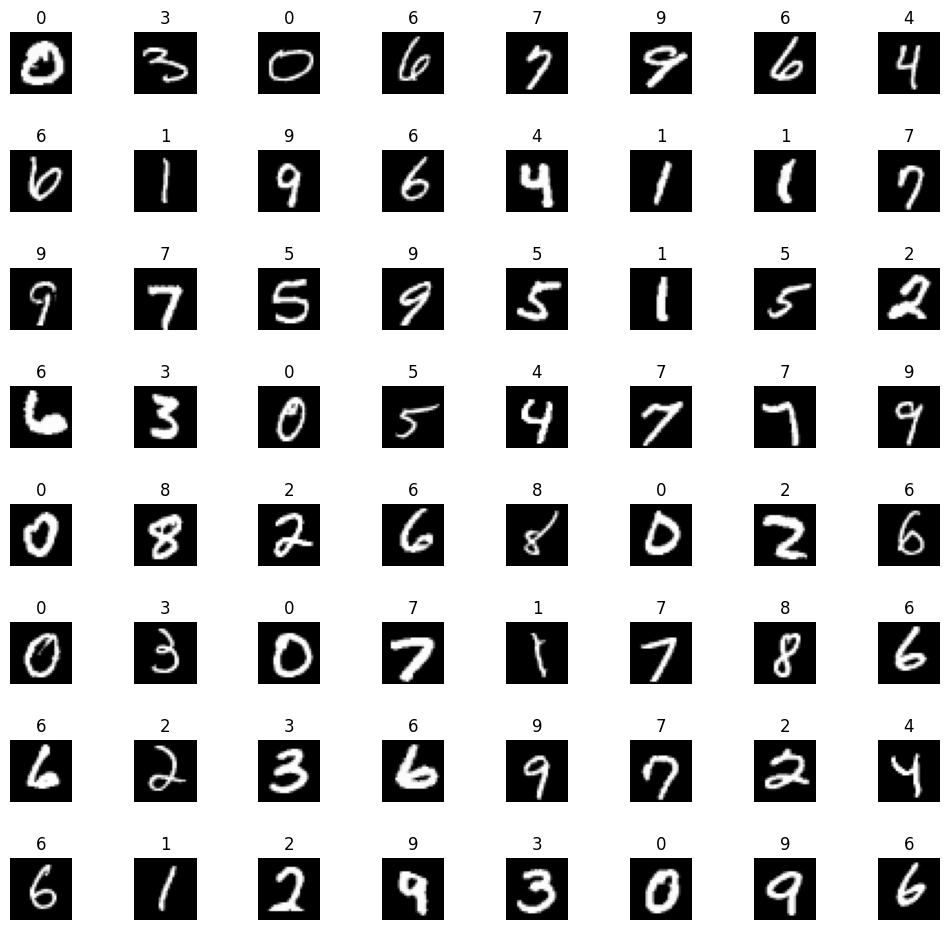


Reshaped X_train for CNN: (60000, 28, 28, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 1, 1, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,242 (1.25 MB)

 Trainable params: 326,410 (1.25 MB)

 Non-trainable params: 832 (3.25 KB)


--- Training Complex CNN Model ---
Epoch 1/5
474/750 ━━━━━━━━━━━━━━━━━━━━ 1:08 249ms/step - accuracy: 0.8101 - loss: 0.6271

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization, Flatten, Dropout, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

# --- Step 2: Loading  Dataset ---
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(f"Original X_train shape: {X_train.shape}")

# --- Step 3: Explore  Dataset ---
def showImages(num_row, num_col, X, Y):
    (X_rand, Y_rand) = shuffle(X, Y)
    fig, axes = plt.subplots(num_row, num_col, figsize=(12, 12))
    axes = axes.ravel()
    for i in range(0, num_row * num_col):
        axes[i].imshow(X_rand[i], cmap='gray') # Use cmap='gray' for mnist
        axes[i].set_title(f"{Y_rand[i]}")
        axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
    plt.show()

print("\n--- Displaying Sample Images ---")
showImages(8, 8, X=X_train, Y=y_train)

# --- Step 4: Preprocessing  Dataset ---
# Normalize pixel values to be between 0 and 1
X_train_cnn = X_train / 255.0
X_test_cnn = X_test / 255.0

# Reshape data to add a channel dimension (1 for grayscale)
X_train_cnn = X_train_cnn.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_cnn.reshape(-1, 28, 28, 1)

print(f"\nReshaped X_train for CNN: {X_train_cnn.shape}")

# --- Step 5: Designing Network (Your Model) ---
model_cnn_complex = Sequential()
model_cnn_complex.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Dropout(0.3))

model_cnn_complex.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Dropout(0.3))

model_cnn_complex.add(Conv2D(128, kernel_size=4, activation='relu', kernel_initializer='he_normal'))
model_cnn_complex.add(BatchNormalization())
model_cnn_complex.add(Flatten())
model_cnn_complex.add(Dropout(0.3))
model_cnn_complex.add(Dense(10, activation='softmax'))

model_cnn_complex.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn_complex.summary()

# --- Step 6: Training  Model ---
print("\n--- Training Complex CNN Model ---")
history_cnn_complex = model_cnn_complex.fit(X_train_cnn, y_train, validation_split=0.2, epochs=5, batch_size=64)

# --- Step 7: Evaluating  Model ---
print("\n--- Evaluating Complex CNN Model ---")
test_loss_complex, test_acc_complex = model_cnn_complex.evaluate(X_test_cnn, y_test)
print(f'Test accuracy (Complex CNN): {test_acc_complex * 100:.2f}%')

In [ ]:
# --- Define a Simpler CNN Model ---
model_cnn_simple = Sequential()

# Layer 1: Conv -> Pool
model_cnn_simple.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn_simple.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Conv -> Pool
model_cnn_simple.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_simple.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Flatten and Dense
model_cnn_simple.add(Flatten())
model_cnn_simple.add(Dense(128, activation='relu'))
model_cnn_simple.add(Dropout(0.5))
model_cnn_simple.add(Dense(10, activation='softmax'))

model_cnn_simple.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn_simple.summary()

# --- Training the Simpler Model ---
# We can re-use the 'X_train_cnn' and 'y_train' data from the previous cell
print("\n--- Training Simple CNN Model ---")
history_cnn_simple = model_cnn_simple.fit(X_train_cnn, y_train, validation_split=0.2, epochs=5, batch_size=64)

# --- Evaluating the Simpler Model ---
print("\n--- Evaluating Simple CNN Model ---")
test_loss_simple, test_acc_simple = model_cnn_simple.evaluate(X_test_cnn, y_test)
print(f'Test accuracy (Simple CNN): {test_acc_simple * 100:.2f}%')

In [ ]:
# --- Preprocessing for ANN ---
# We just need to normalize. No reshaping to add a channel is needed.
X_train_ann = X_train / 255.0
X_test_ann = X_test / 255.0

print(f"Original X_train shape for ANN: {X_train_ann.shape}")

# --- Define the ANN Model ---
model_ann = Sequential()

# Input layer: Flattens the 28x28 image into a 784-neuron vector
model_ann.add(Flatten(input_shape=(28, 28)))

# Hidden layer
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dropout(0.2))

# Output layer: 10 neurons (for 10 digits)
model_ann.add(Dense(10, activation='softmax'))

model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ann.summary()

# --- Training the ANN Model ---
print("\n--- Training ANN Model ---")
history_ann = model_ann.fit(X_train_ann, y_train, validation_split=0.2, epochs=5, batch_size=64)

# --- Evaluating the ANN Model ---
print("\n--- Evaluating ANN Model ---")
test_loss_ann, test_acc_ann = model_ann.evaluate(X_test_ann, y_test)
print(f'Test accuracy (ANN): {test_acc_ann * 100:.2f}%')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# --- Load and preprocess MNIST data (using the original variables) ---
# (X_train, y_train), (X_test, y_test) = mnist.load_data() # Already loaded
X_train_gc = X_train.astype("float32") / 255.0
X_test_gc = X_test.astype("float32") / 255.0
X_train_gc = np.expand_dims(X_train_gc, -1)
X_test_gc = np.expand_dims(X_test_gc, -1)

# --- Build CNN model using Functional API ---
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# Give the last conv layer a name
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_gradcam = Model(inputs, outputs)

# --- Compile and train ---
model_gradcam.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
print("\n--- Training Grad-CAM Model ---")
model_gradcam.fit(X_train_gc, y_train, epochs=5, validation_split=0.1)

# --- Grad-CAM function ---
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs_img = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs_img)
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10) # Add epsilon to avoid divide by zero
    return heatmap.numpy()

# --- Visualize Grad-CAM ---
print("\n--- Visualizing Grad-CAM ---")
image_indices = [10, 20, 5, 30] # Use a list of indices

for i in image_indices:
    image = X_test_gc[i]
    label = y_test[i]

    heatmap = compute_gradcam(model_gradcam, image, label)

    # Resize heatmap to match input image
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()

    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Org Image - Label: {label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5) # Overlay heatmap
    plt.title("Grad-CAM Overlay")
    plt.axis('off')

    plt.tight_layout()
    plt.show()